In [1]:
from paddleocr import PaddleOCR, draw_ocr

In [15]:
det_model_dir=r'C:\Users\HP\.paddleocr\whl\det\ch\ch_PP-OCRv4_det_infer'#文本位置检测模型
rec_model_dir=r'C:\Users\HP\.paddleocr\whl\rec\ch\ch_PP-OCRv4_rec_infer'#文本识别模型
cls_model_dir=r'C:\Users\HP\.paddleocr\whl\cls\ch_ppocr_mobile_v2.0_cls_infer'#文本方向分类模型

In [16]:
 # 初始化PaddleOCR，能够识别180度旋转的文字
ocr = PaddleOCR(use_angle_cls=True, lang='ch', 
                det_model_dir=det_model_dir, rec_model_dir=rec_model_dir, cls_model_dir=cls_model_dir)  # need to run only once to download and load model into memory

[2024/12/17 20:38:55] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\HP\\.paddleocr\\whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\HP\\.paddleocr\\whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e

In [3]:
import cv2
from matplotlib import pyplot as plt

# 基准测试图像

In [4]:
 # 读取图片
image_path = './dataset/001-20.jpg'
img = cv2.imread(image_path)

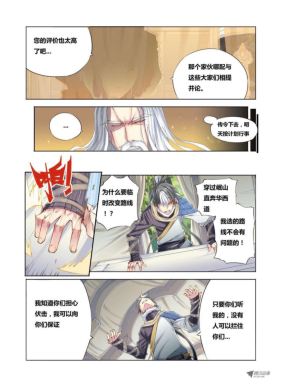

In [5]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
img_gaussian = cv2.GaussianBlur(gray, (5, 5), 0)#先模糊，去除噪声

In [14]:
cv2.imshow('Gaussian Image', img_gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
result = ocr.ocr(image_path, cls=True)

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f'Text: {text}, Confidence: {confidence}')

[2024/12/17 20:02:11] ppocr DEBUG: dt_boxes num : 25, elapsed : 0.6316511631011963
[2024/12/17 20:02:11] ppocr DEBUG: cls num  : 25, elapsed : 0.1735363006591797
[2024/12/17 20:02:12] ppocr DEBUG: rec_res num  : 25, elapsed : 0.5315790176391602
Text: 您的评价也太高, Confidence: 0.9970361590385437
Text: 了吧..., Confidence: 0.7821399569511414
Text: 那个家伙哪配与, Confidence: 0.9927501678466797
Text: 这些大家们相提, Confidence: 0.9971064925193787
Text: 并论。, Confidence: 0.9949002861976624
Text: 传令下去，明, Confidence: 0.9919342398643494
Text: 天按计划行事, Confidence: 0.997978925704956
Text: 穿过岷山, Confidence: 0.9860334396362305
Text: 为什么要临, Confidence: 0.9992399215698242
Text: 直奔华西, Confidence: 0.998004674911499
Text: 时改变路线, Confidence: 0.9986629486083984
Text: 道, Confidence: 0.9998811483383179
Text: ii, Confidence: 0.8117276430130005
Text: 我选的路, Confidence: 0.9981583952903748
Text: 线不会有, Confidence: 0.9988617897033691
Text: 问题的！, Confidence: 0.9877738356590271
Text: 我知道你们担心, Confidence: 0.996158242225647
Text: 只要你们听, C

In [7]:
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[[[109.0, 130.0], [317.0, 130.0], [317.0, 166.0], [109.0, 166.0]], ('您的评价也太高', 0.9970361590385437)]
[[[113.0, 185.0], [197.0, 185.0], [197.0, 219.0], [113.0, 219.0]], ('了吧...', 0.7821399569511414)]
[[[843.0, 259.0], [1048.0, 259.0], [1048.0, 291.0], [843.0, 291.0]], ('那个家伙哪配与', 0.9927501678466797)]
[[[843.0, 307.0], [1050.0, 307.0], [1050.0, 343.0], [843.0, 343.0]], ('这些大家们相提', 0.9971064925193787)]
[[[840.0, 358.0], [915.0, 358.0], [915.0, 398.0], [840.0, 398.0]], ('并论。', 0.9949002861976624)]
[[[979.0, 528.0], [1137.0, 532.0], [1136.0, 565.0], [978.0, 561.0]], ('传令下去，明', 0.9919342398643494)]
[[[980.0, 576.0], [1135.0, 576.0], [1135.0, 607.0], [980.0, 607.0]], ('天按计划行事', 0.997978925704956)]
[[[913.0, 828.0], [1035.0, 828.0], [1035.0, 866.0], [913.0, 866.0]], ('穿过岷山', 0.9860334396362305)]
[[[431.0, 847.0], [585.0, 852.0], [584.0, 890.0], [430.0, 886.0]], ('为什么要临', 0.9992399215698242)]
[[[915.0, 881.0], [1033.0, 881.0], [1033.0, 914.0], [915.0, 914.0]], ('直奔华西', 0.998004674911499)]
[[[431

`result`结果是一个list，每一个item包括了文本框的坐标，文字以及文字识别的置信度。

In [8]:
# draw result
from PIL import Image
result = result[0]
image = Image.open(image_path).convert("RGB")
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores)
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

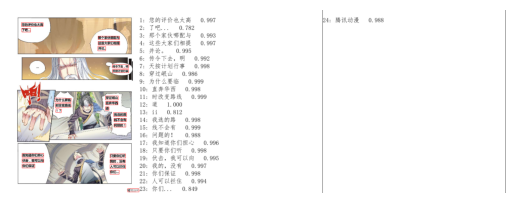

In [9]:
# 使用matplotlib显示图像
plt.imshow(im_show)
plt.axis('off')  # 不显示坐标轴
plt.show()

对于较为规范的对话框识别效果较好，但其可能是像素横向遍历识别，导致并非同一对话框内的文字识别在了一起，因此需要对对话框进行分割。

## 灰度过滤图像提取对话bubble

[2024/12/13 23:04:10] ppocr DEBUG: dt_boxes num : 23, elapsed : 0.2097635269165039
[2024/12/13 23:04:10] ppocr DEBUG: cls num  : 23, elapsed : 0.14951467514038086
[2024/12/13 23:04:10] ppocr DEBUG: rec_res num  : 23, elapsed : 0.6196680068969727
Text: 您的评价也太高, Confidence: 0.9997528195381165
Text: 了吧..., Confidence: 0.9490499496459961
Text: 那个家伙哪配与, Confidence: 0.9961482882499695
Text: 这些大家们相提, Confidence: 0.99689781665802
Text: 并论。, Confidence: 0.991393506526947
Text: 传令下去，明, Confidence: 0.9988088607788086
Text: 天按计划行事, Confidence: 0.9988892674446106
Text: 穿过岷山, Confidence: 0.9846251010894775
Text: 为什么要临, Confidence: 0.9996318817138672
Text: 时改变路线, Confidence: 0.9982139468193054
Text: 道, Confidence: 0.9999604225158691
Text: !?, Confidence: 0.8890215158462524
Text: 我选的路, Confidence: 0.9995096325874329
Text: 线不会有, Confidence: 0.9993903636932373
Text: 问题的, Confidence: 0.9991128444671631
Text: 我知道你们担心, Confidence: 0.9988990426063538
Text: 只要你们听, Confidence: 0.9991819262504578
Text: 伏击，我可以向

# 竖向文本测试图像

In [27]:
# 读取图片
image_path = './dataset/001-05-04.png'
img = cv2.imread(image_path)

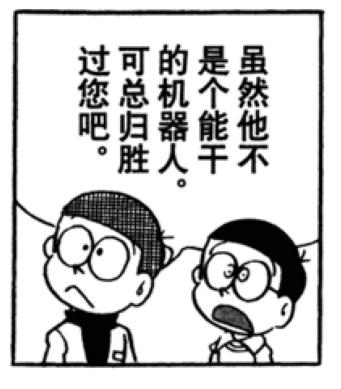

In [28]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [29]:
result = ocr.ocr(image_path, cls=True)

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f'Text: {text}, Confidence: {confidence}')

[2024/12/17 20:54:50] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.029974699020385742
[2024/12/17 20:54:50] ppocr DEBUG: cls num  : 5, elapsed : 0.011968135833740234
[2024/12/17 20:54:50] ppocr DEBUG: rec_res num  : 5, elapsed : 0.06981325149536133
Text: 过可的是虽, Confidence: 0.9920303225517273
Text: 您总机个然, Confidence: 0.9972862005233765
Text: 吧归器能他, Confidence: 0.998395562171936
Text: 胜人干不, Confidence: 0.9832515716552734


In [30]:
# 逆时针旋转90度
rotated_cw = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow('Rotated Clockwise', rotated_cw)
cv2.waitKey(0)
cv2.destroyAllWindows()
 
# 保存旋转后的图像
cv2.imwrite('rotated_cw.jpg', rotated_cw)

True

In [31]:
# 读取图片
image_path = 'rotated_cw.jpg'
img = cv2.imread(image_path)

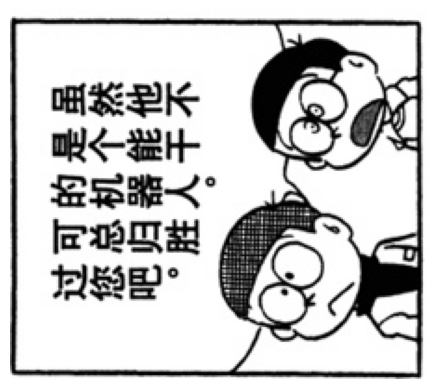

In [32]:
# 将图像编码从BGR转换为RGB，因为matplotlib期望RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# 使用matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [33]:
result = ocr.ocr(image_path, cls=True)

for line in result[0]:
    text = line[1][0]
    confidence = line[1][1]
    print(f'Text: {text}, Confidence: {confidence}')

[2024/12/17 20:54:58] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.027924060821533203
[2024/12/17 20:54:58] ppocr DEBUG: cls num  : 5, elapsed : 0.011968374252319336
[2024/12/17 20:54:58] ppocr DEBUG: rec_res num  : 5, elapsed : 0.049866437911987305
Text: 虽然他不, Confidence: 0.9995666742324829
Text: 是个能干, Confidence: 0.9845728278160095
Text: 的机器人, Confidence: 0.9989638328552246
Text: 可总归胜, Confidence: 0.9995970129966736
Text: 过您吧°, Confidence: 0.9822143316268921
